# Extensiones de la Regresión Lineal

### Introducción


La regresión lineal es una herramienta poderosa para modelar relaciones entre variables independientes (features) y una variable dependiente (target). Sin embargo, en muchos contextos reales, la suposición de linealidad puede resultar demasiado restrictiva. Este notebook explora dos extensiones que permiten superar esa limitación: la regresión polinómica y la regresión pesada.

La regresión polinómica permite modelar relaciones no lineales entre los features y el target. Este modelo —en su versión más simple— se basa en la utilización de polinomios de una variable numérica del dataset para el entrenamiento de un modelo de regresión lineal simple, que calcula el conjunto de coeficientes que mejor se ajusta a este nuevo conjunto de datos transformado.

Bajo la misma premisa que la regresión polinómica, se presenta el modelo de regresión lineal pesada. Este utiliza una técnica que consiste en asignar a cada dato un coeficiente w, llamado peso (weight en inglés), de manera tal que, para cada dato al que se quiera predecir su valor, se le da mayor importancia a los datos más cercanos, cualidad que disminuye cuanto mayor es la distancia.

De esta manera, se calcula un nuevo conjunto de parámetros que relacionan las variables independientes y la variable dependiente para cada dato. Esta característica, dentro de los modelos de Machine Learning, se categoriza como no paramétrica, la cual diferencia a la regresión lineal pesada del modelo de regresión lineal simple, ya que este último calcula un único conjunto de parámetros que intenta modelar la relación entre los features y el target de forma lineal y global para todo el dataset.

### Motivación

Explorar y analizar extensiones de la regresión lineal que ayuden a comprender mejor el poder de adaptación de este modelo al ser puesto a prueba ante datos que, en principio, exceden sus capacidades.

### Objetivo

Presentar de forma práctica y fácilmente reproducible los modelos de regresión polinómica y regresión lineal pesada, procurando seguir buenas prácticas y respetar las convenciones de sintaxis y estructura.

### Datos

Este notebook utiliza un set de datos sintético con el objetivo principal de contribuir a la exploración y análisis de los modelos presentados, además de mantener la reproducibilidad del repositorio de manera sencilla.

## Código

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importamos las clases y funciones propias de la carpeta src
import sys
sys.path.append('../src')
from linear_regression import LinReg
from lwlr import LW_LinReg

,X,y
0,0.046320,0.204618
1,0.050616,-0.541176
2,0.055221,0.328096
3,0.069521,0.478984
4,0.091971,0.509562


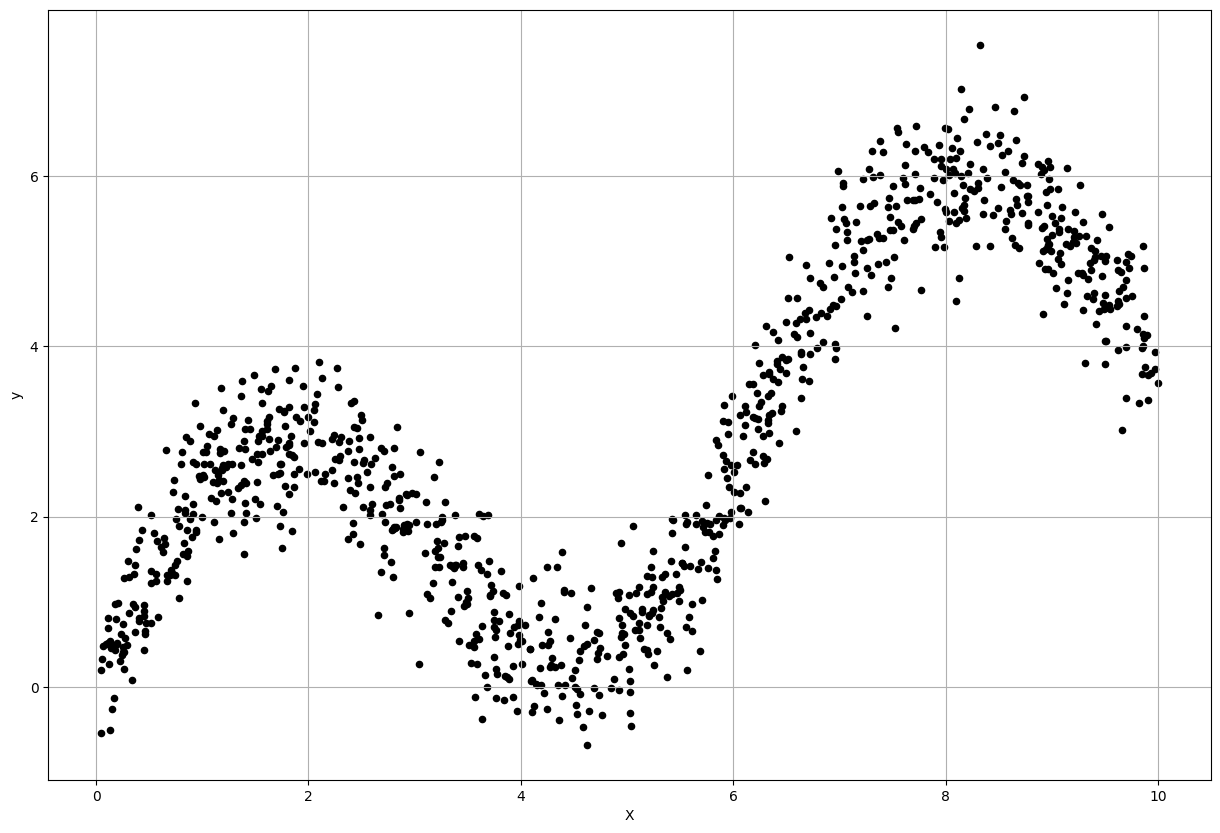

In [2]:
# Cargamos y visualizamos los datos
data = pd.read_csv('../data/dataset_regresion.csv')
data.plot(x='X', y='y', kind='scatter', color='black', figsize=(15, 10), grid=True)
data.head()

## Regresión Polinómica

In [3]:
# Aplicamos la transformación polinómica hasta grado 15
data_poly = data.copy()
grados = 15
for i in range(1, grados):
    data_poly[f'X^{i+1}'] = data_poly['X'] ** i+1

# Separamos los features y el target
X = data_poly.drop(columns=['y']).copy()
y = data_poly['y'].copy()

# Separamos entre conjuntos de entrenamiento (70%) y testeo (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Creamos una función para calcular las regresiones con diferentes grados de polinomio,
# graficar sus predicciones e imprimir el Error Cuadrático Medio (MSE) de cada una
def plot_poly_reg(Data, save=False, savepath='output/poly_reg_predict_vs_real{}.jpg'):
    palette = {2: "#4B0528", 3:'#A5FFD6', 4:'#0D5C63', 5:'#E8D33F', 6:'#EE6352', 7:'#9AE19D',
               8:'#553555', 9:'#137547', 10:"#BE7C4D", 11:'#4B0528', 12:'#042A2B'}
    scores = {}

    X_train, X_test, y_train, y_test = Data
    plt.figure(figsize=(15, 10))
    plt.scatter(X_test['X'], y_test, color='black', alpha=0.8, label='Real')
    for i in range(2, 7):
        model = LinReg()
        model.fit(X_train.iloc[:, :i], y_train)
        scores[f'{i}'] = model.score(X_test.iloc[:, :i], y_test)
        plt.scatter(X_test['X'], model.predict(X_test.iloc[:, :i]), color=palette[i], alpha=0.8, label=f'Pol. Grado {i}')
    plt.title('Predicción vs Real Por Grado de Polinomio')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    if save: plt.savefig(savepath.format('_grado_6'))
    plt.show()

    plt.figure(figsize=(15, 10))
    plt.scatter(X_test['X'], y_test, color='black', alpha=0.8, label='Real')
    for i in range(6, 13):
        model = LinReg()
        model.fit(X_train.iloc[:, :i], y_train)
        scores[f'{i}'] = model.score(X_test.iloc[:, :i], y_test)
        plt.scatter(X_test['X'], model.predict(X_test.iloc[:, :i]), color=palette[i], alpha=0.6, label=f'Pol. Grado {i}')
    plt.title('Predicción vs Real Por Grado de Polinomio')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    if save: plt.savefig(savepath.format('_grado_12'))
    plt.show()

    for i in range(13, 16):
        model = LinReg()
        model.fit(X_train.iloc[:, :i], y_train)
        scores[f'{i}'] = model.score(X_test.iloc[:, :i], y_test)

    print('|Error Cuadrático Medio (MSE)|')
    for i, score in scores.items():
        print(' -------------------------')
        print(f'|Pol. Grado {i:<4} ->  {score:.4f}|')

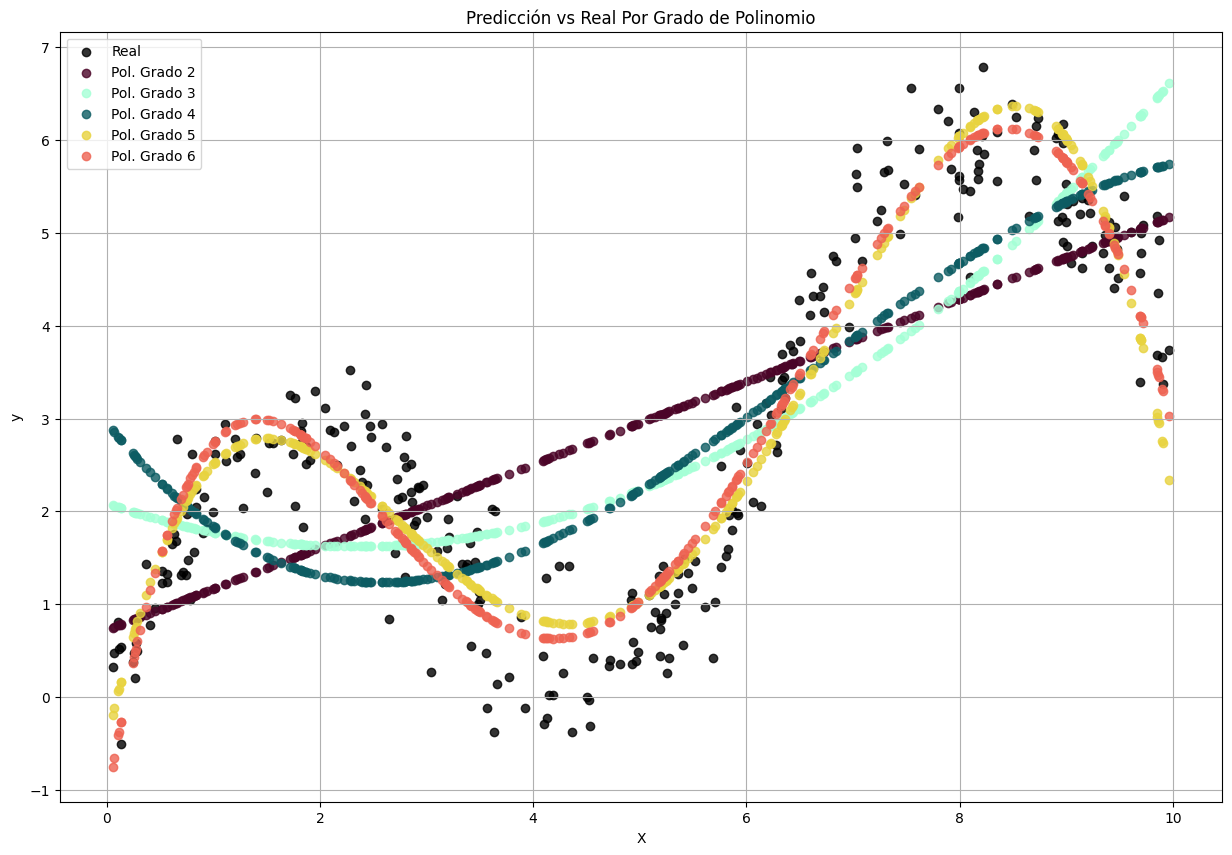

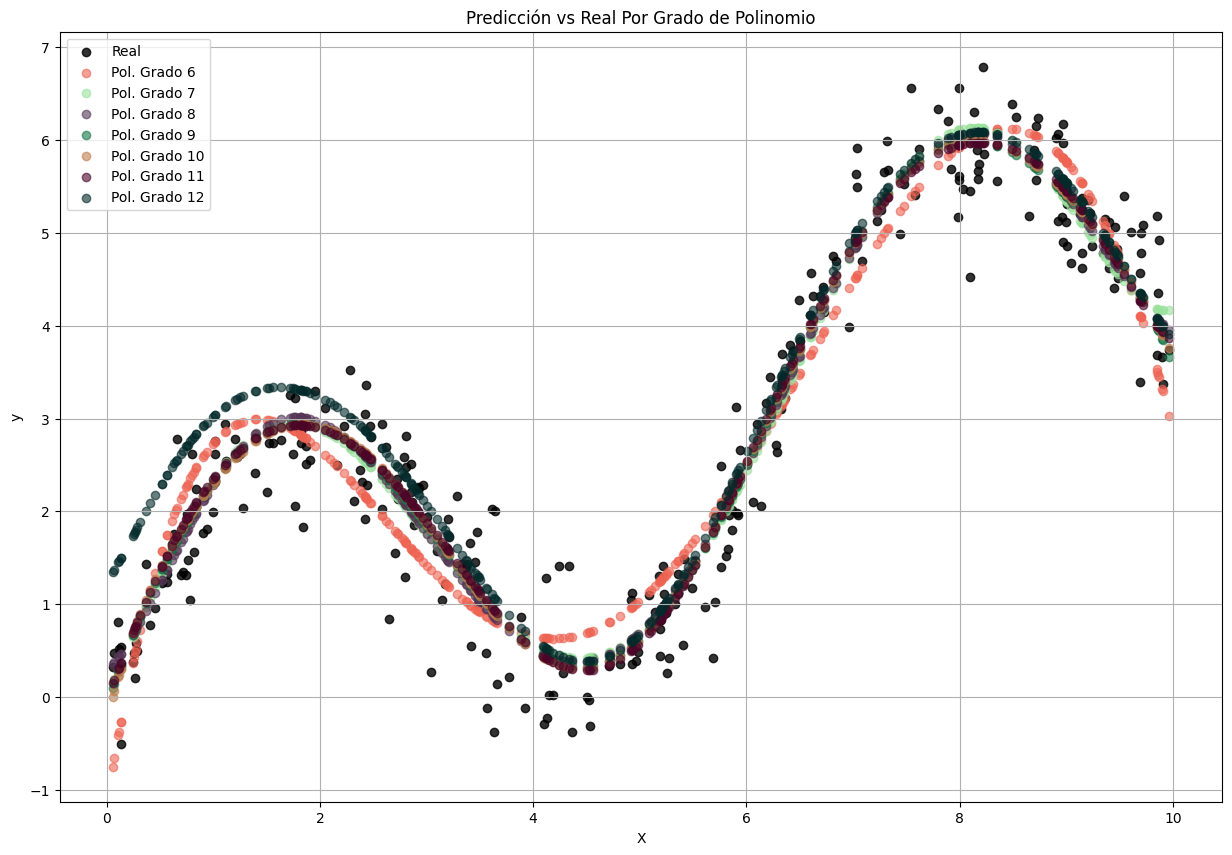

|Error Cuadrático Medio (MSE)|
 -------------------------
|Pol. Grado 2    ->  1.8207|
 -------------------------
|Pol. Grado 3    ->  1.5108|
 -------------------------
|Pol. Grado 4    ->  1.4740|
 -------------------------
|Pol. Grado 5    ->  0.4001|
 -------------------------
|Pol. Grado 6    ->  0.3605|
 -------------------------
|Pol. Grado 7    ->  0.2367|
 -------------------------
|Pol. Grado 8    ->  0.2341|
 -------------------------
|Pol. Grado 9    ->  0.2273|
 -------------------------
|Pol. Grado 10   ->  0.2295|
 -------------------------
|Pol. Grado 11   ->  0.2298|
 -------------------------
|Pol. Grado 12   ->  0.4090|
 -------------------------
|Pol. Grado 13   ->  18140.5585|
 -------------------------
|Pol. Grado 14   ->  5995.6084|
 -------------------------
|Pol. Grado 15   ->  110.8469|


In [5]:
# Ejecutamos la función
plot_poly_reg((X_train, X_test, y_train, y_test), save=True)

### Análisis

Como es posible observar, en los primeros intentos por modelar el comportamiento de la variable 'y' respecto de 'X', las predicciones se encuentran sustancialmente lejos de ser consideradas precisas. Dato de color: el polinomio de grado 2 muestra un comportamiento casi idéntico al de la regresión lineal simple.

Es recién a partir del polinomio de grado 5 que las predicciones empiezan a tomar una forma parecida a la de los datos reales, siendo el de grado 12 el primero en volver a alejarse notablemente. De esta manera, los polinomios de grados entre 6 y 11 parecen arrojar resultados muy similares, con pequeñas diferencias.

De forma más explícita, la tabla que muestra el MSE de cada regresión indica claramente que, a medida que se aumenta el grado del polinomio, mejora la precisión de las predicciones. Este comportamiento se mantiene hasta el grado 9, donde la métrica alcanza su mejor valor. A partir de ahí, comienza a crecer nuevamente, para dispararse exageradamente en el polinomio de grado 13, y luego mejorar relativamente hacia el de grado 15. Estos últimos no fueron graficados debido al desfasaje en la escala de las predicciones.

### Conclusiones

El comportamiento del modelo a lo largo del experimento permite concluir que el aumento en el grado del polinomio con el que se entrena y, posteriormente, se prueba, aporta una mayor flexibilidad. Esto podría deberse a que permite modelar comportamientos y curvas más complejas, debido a que cada conjunto de datos transformado se encuentra en un espacio con mayor número de dimensiones que el anterior.

Sin embargo, esta mejora tiene un límite. Como se pudo observar, dicho límite parece ubicarse en el polinomio de grado 9.

Desde ese punto en adelante, el modelo comienza a evidenciar un claro sobreajuste. Es decir, se ajusta tan exhaustivamente a los datos de entrenamiento que pierde capacidad para generalizar patrones y predecir valores a partir de datos ajenos al conjunto de entrenamiento.

Este fenómeno puede deberse a la cantidad de parámetros que el modelo debe calcular. Al incrementarse excesivamente el número de variables independientes, aumenta la sensibilidad al ruido, lo que a su vez incrementa la varianza de las predicciones y explica el aumento del error cuadrático medio (MSE).

Una posible causa del comportamiento anómalo del MSE en el polinomio de grado 13 podría estar relacionada con cuestiones computacionales. Aunque teóricamente podría atribuirse a un caso extremo de overfit, en ese escenario se esperaría un MSE muy bajo en el conjunto de entrenamiento, lo cual no ocurre. De hecho, al evaluar el modelo sobre el conjunto de entrenamiento en esos grados, el MSE resulta apenas más bajo que en test, pero sigue siendo exageradamente alto. Esto sugiere que podrían estar involucrados otros factores, como inestabilidad numérica o problemas de precisión en el cálculo.

## Regresión Lineal Pesada

In [6]:
# Separamos los features y el target
X = data[['X']].copy()
y = data['y'].copy()

# Separamos entre conjuntos de entrenamiento (70%) y testeo (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Creamos una función que calcula las predicciones de la regresión lineal pesada para cada
# valor de tau, y las grafica, además de imprimir el Error Cuadrático Medio (MSE) de cada una
def plot_lw_linreg(Data, taus, save=False, savepath='output/lw_linreg_tau_comparison.jpg'):
    palette = ["#6FB495", '#EE6352', '#0D5C63', '#4B0528', '#E8D33F', '#9AE19D',
               '#553555', "#BE7C4D", '#137547', "#4B0528", '#042A2B']
    scores = {}
    
    X_train, X_test, y_train, y_test = Data
    plt.figure(figsize=(15, 10))
    plt.scatter(X_test, y_test, color='black', alpha=0.8, label='Real')
    for tau in taus:
        y_pred = LW_LinReg(X_train, y_train, X_test, tau=tau)
        plt.scatter(X_test, y_pred, color=palette[taus.index(tau)], alpha=0.8, label=f'tau={tau}')
        scores[f'{tau}'] = mean_squared_error(y_test, y_pred)
    plt.title('Predicción vs Real. Comparación de tau')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    if save: plt.savefig(savepath)
    plt.show()

    print('|Error Cuadrático Medio (MSE)|')
    for tau, score in scores.items():
        print(' -------------------------')
        print(f'|tau = {tau:<5} ->  {score:.4f}|')    

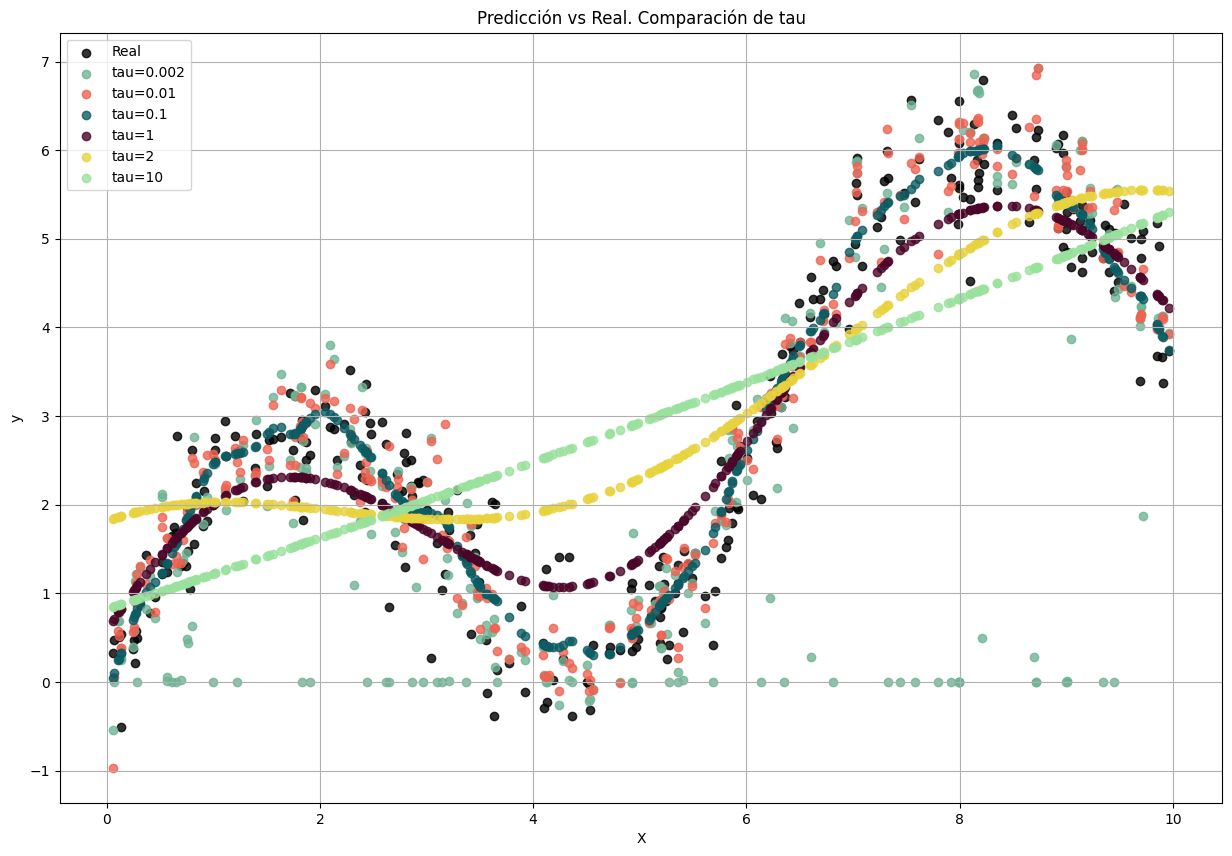

|Error Cuadrático Medio (MSE)|
 -------------------------
|tau = 0.002 ->  2.7112|
 -------------------------
|tau = 0.01  ->  0.3596|
 -------------------------
|tau = 0.1   ->  0.2298|
 -------------------------
|tau = 1     ->  0.4405|
 -------------------------
|tau = 2     ->  1.1469|
 -------------------------
|tau = 10    ->  1.7776|


In [8]:
# Ejecutamos la función
taus = [0.002, 0.01, 0.1, 1, 2, 10]
plot_lw_linreg((X_train, X_test, y_train, y_test), taus, save=True)

### Análisis

Si se toma como punto de partida la predicción con tau = 10, es posible observar que el experimento comienza —al igual que el anterior— con un comportamiento muy similar al de una regresión lineal simple. A medida que se reduce el valor de tau, las predicciones comienzan a dibujar curvas cada vez más suaves, lo que contribuye a disminuir el error cuadrático medio.

Sin embargo, este comportamiento se revierte al cruzar el valor tau = 0.1, donde la regresión alcanza sus mejores predicciones. A partir de ese punto, el error comienza a aumentar, lo que indica una caída en la precisión. Aunque en el gráfico se observa una mayor dispersión de los puntos —lo que podría sugerir que imitan mejor el comportamiento de las variables—, en realidad se alejan más de los datos reales, como lo evidencian los valores del error cuadrático medio.

Finalmente, se pueden observar múltiples puntos de la predicción con tau = 0.002 ubicados sobre la recta y = 0, lo que indica claramente la existencia de errores en la regresión para ese valor de tau.

### Conclusiones

Luego de analizar los resultados del modelo, es posible extraer varias conclusiones:


- Los valores grandes de tau están asociados a predicciones más lineales, lo que indica un claro caso de underfit, simulando un comportamiento similar al de una regresión lineal simple.

- Por el contrario, valores muy pequeños de tau provocan que las predicciones imiten con gran precisión los datos del conjunto de train, pero pierdan capacidad de generalización y reconocimiento de patrones en datos ajenos, lo que evidencia overfit en la regresión.

- Cuando tau se encuentra dentro de un rango óptimo, la regresión logra capturar los patrones de comportamiento de las variables y generalizarlos adecuadamente. En estos casos, se trazan curvas suaves que pasan lo más cerca posible de los datos del conjunto de test, equilibrando precisión y capacidad de generalización.

Este comportamiento se explica porque, en las regresiones pesadas, tau actúa como un parámetro que regula cuán dispersos serán los coeficientes de peso en función de la distancia al dato cuya predicción se desea calcular. Así, valores grandes de tau otorgan una importancia similar a todos los datos, generando parámetros prácticamente constantes en todo el dataset, lo que da lugar a predicciones con forma de recta.

En cambio, valores muy pequeños de tau hacen que incluso una mínima distancia provoque un coeficiente w = 0, anulando casi todos los datos del conjunto de train excepto los más cercanos. Esto explica el overfit y, en casos extremos, que la distancia mínima sea tan estricta que no exista ningún dato suficientemente próximo, lo que ocasiona una predicción nula o igual a cero (debido a cómo la función LW_LinReg() inicializa sus parámetros).